In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
# csv = pd.read_csv(open("data/letters/letters.csv", "r"))

# alpha = {i : chr(ord("a") + i) for i in range(26)}

# y = csv.iloc[:,0]
# x = csv.iloc[:,1:]


In [ ]:
X_sample = x.sample(frac=.7)
Y_sample = y[X_sample.index]
X_test = x[~x.index.isin(X_sample.index)]
Y_test = y[X_test.index]


In [ ]:
model = keras.Sequential([
   layers.Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)),
   layers.MaxPooling2D(pool_size = (2,2)),
   layers.Conv2D(32, kernel_size = 3, activation="relu"),
   layers.Flatten(),
   layers.Dense(26,activation="softmax")
   ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.SparseCategoricalCrossentropy())
model.fit(X_sample.to_numpy().reshape(len(X_sample), 28,28,1), Y_sample,epochs=3, batch_size=128)
#print(X_sample.to_numpy().reshape(len(X_sample), 28,28,1))

In [ ]:
plt.imshow(X_test.iloc[0].to_numpy().reshape(28,28))
p = model.predict(X_test.to_numpy().reshape(len(X_test),28,28,1))
p.shape


In [ ]:
truth = []
for i in range(len(p)):
    truth.append(max(range(len(p[i])), key=p[i].__getitem__))
diff = truth - Y_test
print(len(diff[diff!=0])/len(diff))


[[126, 1430, 5, 26], [126, 1457, 10, 203], [127, 975, 121, 454], [133, 1661, 4, 26], [136, 1000, 221, 670], [169, 1461, 179, 22], [249, 1061, 69, 161], [316, 1223, 8, 16], [323, 1240, 117, 292], [358, 1400, 184, 369], [717, 1031, 25, 40], [762, 1234, 56, 418], [985, 929, 72, 127], [1003, 1057, 73, 570], [1012, 962, 363, 623], [1016, 983, 27, 184], [1042, 1168, 11, 79], [1051, 1248, 14, 102], [1058, 953, 65, 12], [1064, 1351, 63, 416], [1124, 963, 267, 428], [1190, 1678, 16, 14], [1209, 1527, 100, 179], [1309, 1462, 23, 64], [1332, 1404, 20, 59], [1375, 270, 12, 40], [1612, 1405, 27, 256], [1622, 1385, 5, 23], [1623, 1281, 5, 38], [1624, 1537, 322, 200], [1626, 1316, 5, 44], [1627, 1661, 10, 37], [1628, 1087, 16, 152], [1629, 1224, 8, 64], [1642, 996, 361, 90], [1649, 1007, 348, 422], [1654, 1440, 20, 98], [1670, 1393, 82, 32], [1675, 1389, 194, 51], [1756, 1362, 166, 31], [2288, 1203, 104, 579], [2343, 1006, 49, 539], [2388, 918, 51, 90], [2390, 1070, 19, 135], [2406, 1005, 26, 64], [2

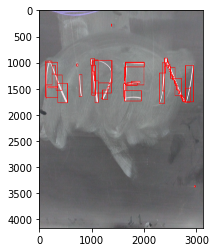

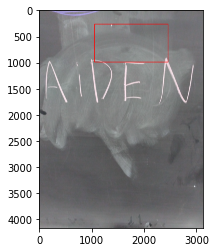

In [41]:
import matplotlib.patches as patches

im = cv2.imread("img.jpg")
gray = cv2.cvtColor(im,  cv2.COLOR_BGR2GRAY)
th = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)[1]

cny = cv2.Canny(th,100,200)

contours, hierarchy = cv2.findContours(cny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rects = []
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
def do_overlap(rects1, rects2):
    x1,y1,w1,h1 = rects1[0], rects1[1], rects1[2], rects1[3]
    x2,y2,w2,h2 = rects2[0], rects2[1], rects2[2], rects2[3]
    l1,r1,l2,r2 = Point(x1,y1), Point(x1 + w1, y1 + h1), Point(x2, y2), Point(x2  + w2,y2 +h2)
    # if rectangle has area 0, no overlap
     
    # If one rectangle is on left side of other
    if l1.x > r2.x or l2.x > r1.x:
        return False
 
    # If one rectangle is above other
    if l1.y > r2.y or l2.y > r1.y:
        return False
    return True

def distance(rects1, rects2):
    x1,y1,w1,h1 = rects1[0], rects1[1], rects1[2], rects1[3]
    x2,y2,w2,h2 = rects2[0], rects2[1], rects2[2], rects2[3]
    return max(abs(x1-x2) - abs(w1-w2)/2.0, abs(y1-y2)-abs(h1-h2)/2.0)
 
def mergeRectangle(r1,r2):
    x,y,w,h = r1[0],r1[1],r1[2],r1[3]
    return cv2.boundingRect(np.array([[x,y], [x+w,y+h], [r2[0], r2[1], [r2[0] + r2[2]], [r2[1] + r2[3]]]]))
    # return  [min(x,r2[0]) , min(y,r2[1]), abs(max(x + w, r2[0] + r2[2]) -min(x,r2[0]))  , abs(max(h + y, r2[1] + r2[3])- min(y,r2[1]))]
overlap = False
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if(w * h > 100):
        rects.append([x,y,w,h])

def getAllRects(rects, index, bounds):
    overlaps = []
    temp = [bounds[0], bounds[1], bounds[2], bounds[3]]

    for i in range(len(rects)):
        if(do_overlap(bounds, rects[i]) and i != index):
                overlaps.append(i)
           
    return overlaps

for i in rects:
    x,y,w,h = i[0],i[1],i[2],i[3]
    cv2.rectangle(im,(x,y),(x+w,y+h),(255,0,0),10)

fig, ax = plt.subplots()
plt.imshow(im, cmap="gray_r")
th = 20
finished = False
print(sorted(rects))
while not finished:
    finished = True
    index = len(rects) - 1
    while index >= 0:
        t = [rects[index][0] - th, rects[index][1] - th , rects[index][2] + th, rects[index][3] + th]
        overlap = getAllRects(rects, index, t)

        r = rects[overlap[0]] if len(overlap) > 0 else []
        if(len(overlap) > 0):
            overlap.append(index)
            con = []
            for ind in range(len(overlap)):
                con.append([[rects[ind][0], rects[ind][1] ]])
                con.append([[rects[ind][0] + rects[ind][2],rects[ind][1] + rects[ind][3]]])
            con = np.array(con)
            x,y,w,h = cv2.boundingRect(con)
            w -= 1
            h -= 1
            merged = [x,y,w,h]

                # mergeRectangle(r,rects[overlap[ind]])
            overlap.sort(reverse = True)
            for ind in overlap:
                del rects[ind]
            rects.append(merged)
            finished = False
            break
        # print(overlap)
        index-=1

        


          

    #   im = cv2.imread("img.jpg")

    #   for i in rects:
    #     x,y,w,h = i[0],i[1],i[2],i[3]
    #     cv2.rectangle(im,(x,y),(x+w,y+h),(255,0,0),10)

    #   fig, ax = plt.subplots()
    #   plt.imshow(im, cmap="gray_r")



im = cv2.imread("img.jpg")

for i in rects:
    x,y,w,h = i[0],i[1],i[2],i[3]
    cv2.rectangle(im,(x,y),(x+w,y+h),(255,0,0),10)

fig, ax = plt.subplots()
plt.imshow(im, cmap="gray_r")
print(sorted(rects))

    # ax.add_patch(patches.Rectangle((x, y), x+w, y+h, linewidth=1, edgecolor='r', facecolor='none'))
# thresh  = 2
# boxes = []


In [43]:
print(do_overlap([1058, 953, 65, 12], [1064, 1351, 63, 416]))

False
